In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# let's separate the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((14448, 8), (6192, 8))

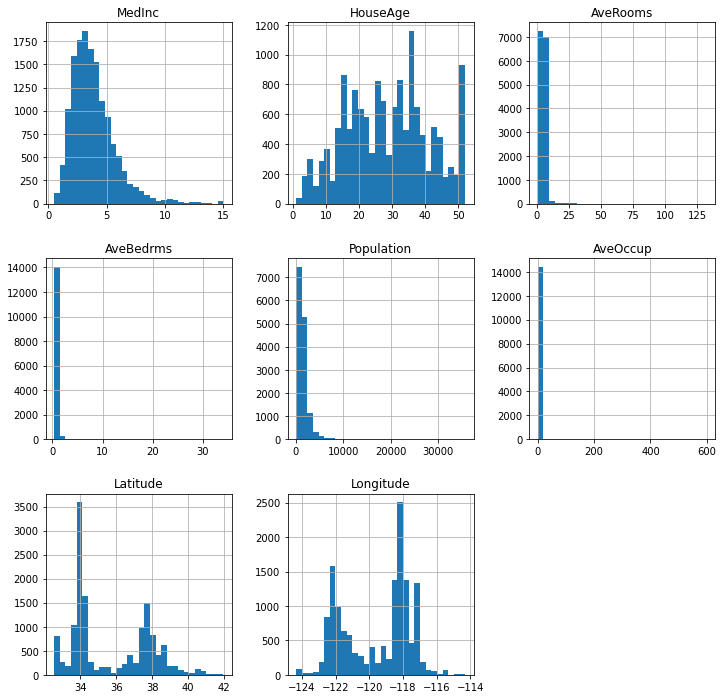

In [4]:
# Plot histograms to inspect variable distributions

X_train.hist(bins=30, figsize=(12, 12))
plt.show()

## Equal-width discretization with pandas

First we need to determine the interval edges or limits.

In [5]:
# variable for recipe

var = "HouseAge"

In [6]:
# Let's capture the minimum and maximum values

min_value = int(X_train[var].min())
max_value = int(X_train[var].max())

min_value, max_value

(1, 52)

In [7]:
# let's determine the interval width

width = int((max_value - min_value) / 10)

width

5

In [8]:
# let's generate the interval limits

intervals = [i for i in range(min_value, max_value + width, width)]

intervals

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56]

In [9]:
# discretise the variable in train set

var_disc = "HouseAge_disc"

X_train[var_disc] = pd.cut(x=X_train[var], bins=intervals, include_lowest=True)


X_train[[var, var_disc]].head(10)

,HouseAge,HouseAge_disc
1989,52.0,"(51.0, 56.0]"
256,43.0,"(41.0, 46.0]"
7887,17.0,"(16.0, 21.0]"
4581,17.0,"(16.0, 21.0]"
1993,50.0,"(46.0, 51.0]"
10326,11.0,"(6.0, 11.0]"
10339,14.0,"(11.0, 16.0]"
12992,17.0,"(16.0, 21.0]"
10458,6.0,"(0.999, 6.0]"
1700,10.0,"(6.0, 11.0]"


In [10]:
# let's discretise the variables in the test set

X_test[var_disc] = pd.cut(x=X_test[var], bins=intervals, include_lowest=True)

X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseAge_disc
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05,"(21.0, 26.0]"
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97,"(31.0, 36.0]"
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84,"(26.0, 31.0]"
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60,"(36.0, 41.0]"
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43,"(21.0, 26.0]"


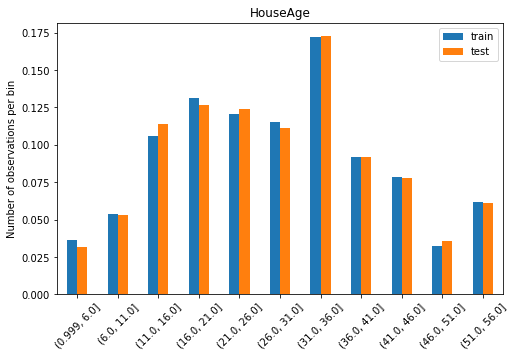

In [11]:
# Let's make bar plots with the number of observations
# per interval

# determine proportion of observations per bin
t1 = X_train[var_disc].value_counts(normalize=True)
t2 = X_test[var_disc].value_counts(normalize=True)

# concatenate proportions
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ["train", "test"]

# plot
tmp.plot.bar(figsize=(8, 5))
plt.xticks(rotation=45)
plt.ylabel("Number of observations per bin")
plt.title("HouseAge")
plt.show()

## Equal-width discretization with Feature-engine

In [12]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [13]:
# let's separate the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

In [14]:
# the variables to discretise

variables = ["MedInc", "HouseAge", "AveRooms"]

In [15]:
# With Feature-engine we can discretize subsets of variables
# within the datasets

disc = EqualWidthDiscretiser(
    bins=8,
    variables=variables,
    return_boundaries=True,
)

disc.fit(X_train)

EqualWidthDiscretiser(bins=8, return_boundaries=True,
                      variables=['MedInc', 'HouseAge', 'AveRooms'])

In [16]:
# the limits of the intervals are stored in the binner_dict_

disc.binner_dict_

{'MedInc': [-inf,
  2.312425,
  4.12495,
  5.937475,
  7.75,
  9.562525,
  11.37505,
  13.187574999999999,
  inf],
 'HouseAge': [-inf, 7.375, 13.75, 20.125, 26.5, 32.875, 39.25, 45.625, inf],
 'AveRooms': [-inf,
  17.307051282051283,
  33.76794871794872,
  50.228846153846156,
  66.68974358974359,
  83.15064102564102,
  99.61153846153846,
  116.0724358974359,
  inf]}

In [17]:
# transform train and test sets

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

In [18]:
# The original variable values are now
# replaced by the intervals:

test_t.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,"(4.125, 5.937]","(20.125, 26.5]","(-inf, 17.307]",1.075472,1551.0,4.180593,32.58,-117.05
10101,"(4.125, 5.937]","(26.5, 32.875]","(-inf, 17.307]",0.927739,1296.0,3.020979,33.92,-117.97
20566,"(4.125, 5.937]","(26.5, 32.875]","(-inf, 17.307]",1.026217,1554.0,2.910112,38.65,-121.84
2670,"(2.312, 4.125]","(32.875, 39.25]","(-inf, 17.307]",1.316901,390.0,2.746479,33.20,-115.60
15709,"(4.125, 5.937]","(20.125, 26.5]","(-inf, 17.307]",1.039578,649.0,1.712401,37.79,-122.43


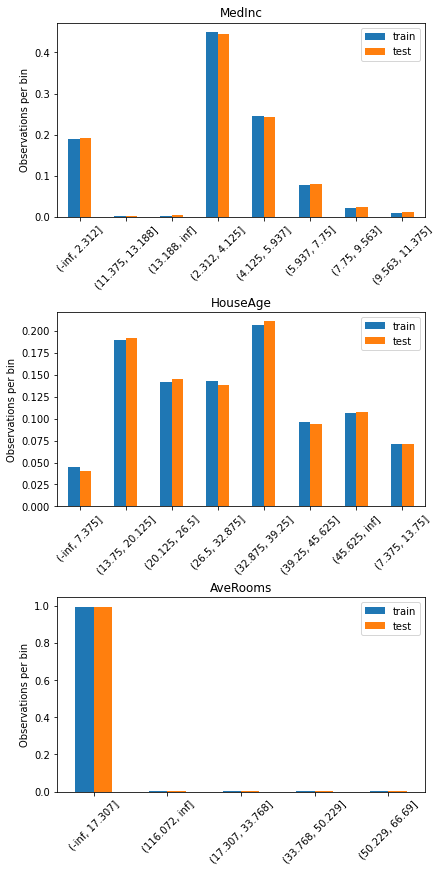

In [19]:
# Let's make bar plots with the number of
# observations per bin for the 3 discretized
# variables:

plt.figure(figsize=(6, 12), constrained_layout=True)

for i in range(3):

    # location of plot in figure
    ax = plt.subplot(3, 1, i + 1)

    # the variable to plot
    var = variables[i]

    # determine proportion of observations per bin
    t1 = train_t[var].value_counts(normalize=True)
    t2 = test_t[var].value_counts(normalize=True)

    # concatenate proportions
    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ["train", "test"]

    # sort the intervals
    tmp.sort_index(inplace=True)

    # make plot
    tmp.plot.bar(ax=ax)
    plt.xticks(rotation=45)
    plt.ylabel("Observations per bin")

    # add variable name as title
    ax.set_title(var)

plt.show()

## Equal-width discretization with Scikit-Learn

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [21]:
# let's set up an equal-width discretizer into 8 intervals

disc = KBinsDiscretizer(n_bins=8, encode="ordinal", strategy="uniform")

# Let's set up the column transformer to apply the discretization
# to the selected variables

ct = ColumnTransformer(
    [("discretizer", disc, variables)],
    remainder="passthrough",
)

# let's fit the discretizer so it learns the interval limits
ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('discretizer',
                                 KBinsDiscretizer(encode='ordinal', n_bins=8,
                                                  strategy='uniform'),
                                 ['MedInc', 'HouseAge', 'AveRooms'])])

In [22]:
# the interval limits are stored in the bin_edges_ attribute

ct.named_transformers_["discretizer"].bin_edges_

array([array([ 0.4999  ,  2.312425,  4.12495 ,  5.937475,  7.75    ,  9.562525,
              11.37505 , 13.187575, 15.0001  ])                                ,
       array([ 1.   ,  7.375, 13.75 , 20.125, 26.5  , 32.875, 39.25 , 45.625,
              52.   ])                                                       ,
       array([  0.84615385,  17.30705128,  33.76794872,  50.22884615,
               66.68974359,  83.15064103,  99.61153846, 116.0724359 ,
              132.53333333])                                         ],
      dtype=object)

In [23]:
# transform the data

train_t = ct.transform(X_train)
test_t = ct.transform(X_test)

train_t

array([[   0.        ,    7.        ,    0.        , ...,    4.825     ,
          36.73      , -119.79      ],
       [   0.        ,    6.        ,    0.        , ...,    3.01805054,
          37.77      , -122.21      ],
       [   3.        ,    2.        ,    0.        , ...,    3.81043956,
          33.87      , -118.04      ],
       ...,
       [   1.        ,    4.        ,    0.        , ...,    1.7913486 ,
          36.58      , -121.9       ],
       [   2.        ,    5.        ,    0.        , ...,    2.24786325,
          33.62      , -117.93      ],
       [   0.        ,    2.        ,    0.        , ...,    3.43624161,
          32.8       , -115.56      ]])

In [24]:
# convert the numpy array into a pandas dataframe
output_vars = variables + [
    "AveBedrms",
    "Population",
    "AveOccup",
    "Latitud",
    "Longitude",
]

# transform array to dataframe
train_t = pd.DataFrame(train_t, columns=output_vars)
test_t = pd.DataFrame(test_t, columns=output_vars)

train_t.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitud,Longitude
0,0.0,7.0,0.0,0.700000,193.0,4.825000,36.73,-119.79
1,0.0,6.0,0.0,1.184116,836.0,3.018051,37.77,-122.21
2,3.0,2.0,0.0,1.087912,1387.0,3.810440,33.87,-118.04
3,0.0,2.0,0.0,1.196000,3051.0,3.051000,34.06,-118.28
4,0.0,7.0,0.0,1.161677,606.0,3.628743,36.73,-119.81


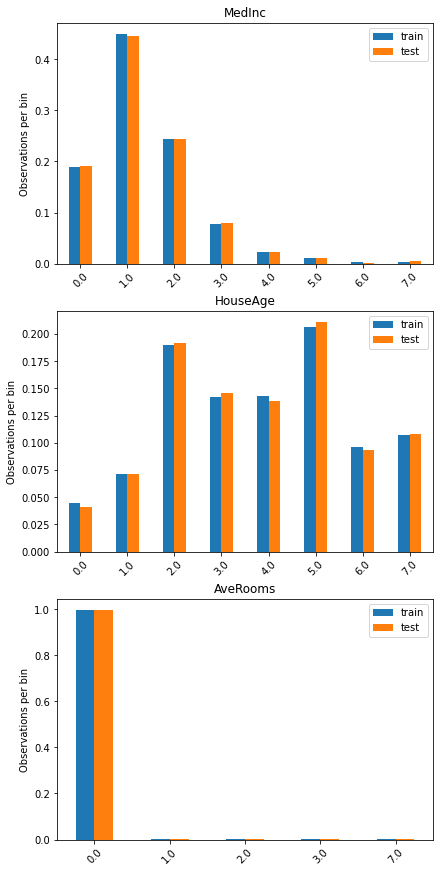

In [25]:
# Let's make bar plots with the number of
# observations per bin for the 3 discretized
# variables:

plt.figure(figsize=(6, 12), constrained_layout=True)

for i in range(3):

    # location in figure
    ax = plt.subplot(3, 1, i + 1)

    # variable to plot
    var = variables[i]

    # determine proportion of observations per bin
    t1 = train_t[var].value_counts(normalize=True)
    t2 = test_t[var].value_counts(normalize=True)

    # concatenate proportions
    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ["train", "test"]

    tmp.plot.bar(ax=ax)
    plt.xticks(rotation=45)
    plt.ylabel("Observations per bin")

    # add variable name as title
    ax.set_title(var)

plt.show()